#**Import Packages**

In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
import statsmodels.formula.api as smf
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import joblib

#**Import Data**

In [ ]:
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")
train = pd.read_csv("train.csv")

In [ ]:
features.info() #take a preliminary look at the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
train #take a preliminary look at the dataset 

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
train.min()

Store                    1
Dept                     1
Date            2010-02-05
Weekly_Sales      -4988.94
IsHoliday            False
dtype: object

In [ ]:
train.max()

Store                   45
Dept                    99
Date            2012-10-26
Weekly_Sales     693099.36
IsHoliday             True
dtype: object

In [ ]:
stores.min()

Store        1
Type         A
Size     34875
dtype: object

In [ ]:
stores.max()

Store        45
Type          C
Size     219622
dtype: object

#**Check Out Features DataFrame**

In [ ]:
features #taking a look at the features dataframe

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
features.isna().sum() #seeing what feature columns have missing values

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

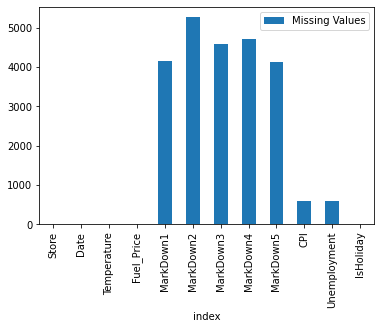

In [ ]:
features.isna().sum().reset_index(name="Missing Values").plot.bar(x='index', y='Missing Values') #Visualizing the Missing values in each column index

In [ ]:
features.min() #finding the minimum values per column

Store                    1
Date            2010-02-05
Temperature          -7.29
Fuel_Price           2.472
MarkDown1         -2781.45
MarkDown2          -265.76
MarkDown3          -179.26
MarkDown4             0.22
MarkDown5          -185.17
CPI                126.064
Unemployment         3.684
IsHoliday            False
dtype: object

In [ ]:
features.max() #finding the maximum values per column

Store                   45
Date            2013-07-26
Temperature         101.95
Fuel_Price           4.468
MarkDown1        103184.98
MarkDown2        104519.54
MarkDown3        149483.31
MarkDown4         67474.85
MarkDown5         771448.1
CPI             228.976456
Unemployment        14.313
IsHoliday             True
dtype: object

In [ ]:
features[features.columns[features.isnull().any()]] #Returns Only the Columns with missing values so we know what we need to address

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...
8185,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
8186,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
8187,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
8188,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN


##Fill the missing values in the MarkDown and CPI Columns with 0

In [ ]:
features[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = features[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0) #Replacing the missing values in the MarkDown columns with 0 since there is no discount being presented

In [ ]:
features[['CPI']] = features[['CPI']].fillna(0) ##Replacing the missing values in the CPI columns with 0 since there is no change being presented

In [ ]:
features.isna().sum() #see how many missing values are in each column

Store             0
Date              0
Temperature       0
Fuel_Price        0
MarkDown1         0
MarkDown2         0
MarkDown3         0
MarkDown4         0
MarkDown5         0
CPI               0
Unemployment    585
IsHoliday         0
dtype: int64

#**Drop the remaining missing values from the unemployment column, this still returns 93% of the data.**

In [ ]:
features = features.dropna() #Dropping the remaining missing values which are all in unemployment

In [ ]:
features.isna().sum() #see how many missing values are in each column

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [ ]:
stores.count() #count of how many non missing values there are in each column

Store    45
Type     45
Size     45
dtype: int64

In [ ]:
train.count() #count of how many non missing values there are in each column

Store           421570
Dept            421570
Date            421570
Weekly_Sales    421570
IsHoliday       421570
dtype: int64

#**Merge the three DataFrames, Features, Stores, Train**

In [ ]:
Total_DF = train.merge(features, on=['Store', 'Date'], how='left').merge(stores, on=['Store'], how='left')#Merging the three dataframes on the Store and Date columns since they are all present in the different data frames

In [ ]:
Total_DF = Total_DF.drop(['IsHoliday_y'], axis=1) #Dropping the IsHoliday_y column because it is a duplicate column from the merge

In [ ]:
Total_DF = Total_DF.rename(columns = {'IsHoliday_x':'Holiday Week'}) #Renaming the IsHoliday column to Holiday Week for user comprehension

In [ ]:
Total_DF #look at the combined dataframe

,Store,Dept,Date,Weekly_Sales,Holiday Week,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221


#Remove any negative sales numbers for the week because returns are not predictable 

In [ ]:
Total_DF = Total_DF.loc[Total_DF['Weekly_Sales'] > 0] #getting only the sales that are greater than 0 because returns and negative sales are not predictable 

In [ ]:
Total_DF

,Store,Dept,Date,Weekly_Sales,Holiday Week,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [ ]:
Total_DF.count() #seeing how many null values there are after the merge

Store           420212
Dept            420212
Date            420212
Weekly_Sales    420212
Holiday Week    420212
Temperature     420212
Fuel_Price      420212
MarkDown1       420212
MarkDown2       420212
MarkDown3       420212
MarkDown4       420212
MarkDown5       420212
CPI             420212
Unemployment    420212
Type            420212
Size            420212
dtype: int64

In [ ]:
Total_DF.describe #gives first and last 5 rows so we can check out the info

<bound method NDFrame.describe of         Store  Dept        Date  Weekly_Sales  Holiday Week  Temperature  \
0           1     1  2010-02-05      24924.50         False        42.31   
1           1     1  2010-02-12      46039.49          True        38.51   
2           1     1  2010-02-19      41595.55         False        39.93   
3           1     1  2010-02-26      19403.54         False        46.63   
4           1     1  2010-03-05      21827.90         False        46.50   
...       ...   ...         ...           ...           ...          ...   
421565     45    98  2012-09-28        508.37         False        64.88   
421566     45    98  2012-10-05        628.10         False        64.89   
421567     45    98  2012-10-12       1061.02         False        54.47   
421568     45    98  2012-10-19        760.01         False        56.47   
421569     45    98  2012-10-26       1076.80         False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  

#**Split Into DateTime so that we can use them as metrics**
##Returns: Year, Month, Week End

In [ ]:
#Total_DF

In [ ]:
Total_DF['Date'] = pd.to_datetime(Total_DF['Date']) #Convert the Date column to DateTime in order to split up data by Year, Month, and Week End

<ipython-input-34-40cfa671d119>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_DF['Date'] = pd.to_datetime(Total_DF['Date']) #Convert the Date column to DateTime in order to split up data by Year, Month, and Week End


In [ ]:
Total_DF['Year'] = Total_DF['Date'].dt.year #Split up by year

<ipython-input-35-1e8ad144ddfa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_DF['Year'] = Total_DF['Date'].dt.year #Split up by year


In [ ]:
Years = Total_DF['Year'] #Years columns only

In [ ]:
Total_DF['Month'] = Total_DF['Date'].dt.month #Split up by month

<ipython-input-37-6633b9807b68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_DF['Month'] = Total_DF['Date'].dt.month #Split up by month


In [ ]:
Months = Total_DF['Month'] #Month columns only 

In [ ]:
Total_DF['Week End'] = Total_DF['Date'].dt.day #Split up by Day

<ipython-input-39-c761a33444d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_DF['Week End'] = Total_DF['Date'].dt.day #Split up by Day


In [ ]:
Week_End = Total_DF['Week End'] #Week end columns only

In [ ]:
Total_DF = Total_DF.sort_values(by=['Store', 'Date']) #sort the dataframe by the Store and Date columns in that order of importance

In [ ]:
Total_DF

,Store,Dept,Date,Weekly_Sales,Holiday Week,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week End
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2010,2,5
143,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2010,2,5
286,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2010,2,5
429,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2010,2,5
572,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2010,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421012,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,10,26
421146,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,10,26
421289,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,10,26
421434,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,10,26


In [ ]:
Total_DF.isna().sum() #see if there are any other missing values

Store           0
Dept            0
Date            0
Weekly_Sales    0
Holiday Week    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Week End        0
dtype: int64

##**Get Categorical variables so we can Label Encode them**
###**We have True or False so we Label Encode to return 1 for True and 0 for False**
We cannot train a model with categorical variables so we encode them so we can feed them into the model predictions

In [ ]:
Holiday_week = Total_DF['Holiday Week'] #Get the categorical variables

In [ ]:
Holiday_week = np.asarray(Holiday_week) #Turn it into an array and reshape it so we can Label Encode

In [ ]:
Holiday_week

array([False, False, False, ..., False, False, False])

In [ ]:
le = preprocessing.LabelEncoder() #Instantiate an object of Label Encoder class
Week_of_Holiday = le.fit_transform(Holiday_week) #Label encode Holiday Weeks

In [ ]:
Week_of_Holiday = pd.DataFrame(Week_of_Holiday) #Create DataFrame from array so we can replace the IsHoliday column with it

In [ ]:
Week_of_Holiday.columns = ['Week_of_Holiday'] #Rename Column 

In [ ]:
Week_of_Holiday #Created a new dataframe for Week of Holiday so taht we can replace the Holiday Week with the encoded column

,Week_of_Holiday
0,0
1,0
2,0
3,0
4,0
...,...
420207,0
420208,0
420209,0
420210,0


In [ ]:
Total_DF['Holiday Week'] = Week_of_Holiday['Week_of_Holiday'] #Replace IsHoliday column with Week_of_Holiday

In [ ]:
Total_DF

,Store,Dept,Date,Weekly_Sales,Holiday Week,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week End
0,1,1,2010-02-05,24924.50,0.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2010,2,5
143,1,2,2010-02-05,50605.27,1.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2010,2,5
286,1,3,2010-02-05,13740.12,0.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2010,2,5
429,1,4,2010-02-05,39954.04,0.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2010,2,5
572,1,5,2010-02-05,32229.38,0.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2010,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421012,45,93,2012-10-26,2487.80,NaN,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,10,26
421146,45,94,2012-10-26,5203.31,NaN,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,10,26
421289,45,95,2012-10-26,56017.47,NaN,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,10,26
421434,45,97,2012-10-26,6817.48,NaN,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,10,26


#**We have to encode the Type column because it is A, B, C and we need it to be numeric**

In [ ]:
Total_DF.groupby(['Holiday Week','Type'])['Weekly_Sales'].mean() #Check to see how Holiday Week affects the Weekly Sales

Holiday Week  Type
0.0           A       20333.454672
              B       12390.092039
              C        9382.281718
1.0           A       17698.558087
              B       10401.628472
              C       11738.342426
Name: Weekly_Sales, dtype: float64

In [ ]:
Store_Type = Total_DF['Type']

In [ ]:
Store_Type = np.asarray(Store_Type).reshape(-1,1) #Turn it into an array and reshape it so we can Label Encode

In [ ]:
OHE = OneHotEncoder(sparse=False) #train OneHotEncoder
Type_encoded = OHE.fit_transform(Store_Type) #fit and tranform the dataset with OHE

In [ ]:
TYPE = pd.DataFrame(Type_encoded) #Create DataFrame from array so we can replace the IsHoliday column with it

In [ ]:
TYPE.columns = ['Type_A', 'Type_B', 'Type_C'] #Rename Columns to be readable and easier to understand

In [ ]:
Total_DF = Total_DF.drop(['Type'], axis=1)

In [ ]:
Type_A = TYPE['Type_A']

In [ ]:
Type_B = TYPE['Type_B']

In [ ]:
Type_C = TYPE['Type_C']

In [ ]:
Total_DF.insert(15, 'Type_A', TYPE['Type_A']) #Insert Type_A column in the 15th index of the Total_DF

In [ ]:
Total_DF.insert(16, 'Type_B', TYPE['Type_B']) #Insert Type_B column in the 16th index of the Total_DF

In [ ]:
Total_DF.insert(17, 'Type_C', TYPE['Type_C']) #Insert Type_C column in the 17th index of the Total_DF

#**Returns NaN values, so we drop them from the Total_DF since it still keeps 99% of the data**

In [ ]:
Total_DF = Total_DF.dropna() #Drop missing values returned, still retain 99% of the data

In [ ]:
Total_DF.isna().sum() #Checking to see if there are any more Null values in the DataFrame

Store           0
Dept            0
Date            0
Weekly_Sales    0
Holiday Week    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Size            0
Type_A          0
Type_B          0
Type_C          0
Year            0
Month           0
Week End        0
dtype: int64

In [ ]:
Total_DF = Total_DF.drop(['Date'], axis=1) #Drop the Date 

In [ ]:
Total_DF

,Store,Dept,Weekly_Sales,Holiday Week,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C,Year,Month,Week End
0,1,1,24924.50,0.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,1.0,0.0,0.0,2010,2,5
143,1,2,50605.27,1.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,1.0,0.0,0.0,2010,2,5
286,1,3,13740.12,0.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,1.0,0.0,0.0,2010,2,5
429,1,4,39954.04,0.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,1.0,0.0,0.0,2010,2,5
572,1,5,32229.38,0.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,1.0,0.0,0.0,2010,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419595,45,79,14618.60,0.0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,0.0,1.0,0.0,2012,10,26
419725,45,80,670.88,1.0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,0.0,1.0,0.0,2012,10,26
419868,45,81,14693.09,0.0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,0.0,1.0,0.0,2012,10,26
420011,45,82,17360.33,0.0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,0.0,1.0,0.0,2012,10,26


In [ ]:
Total_DF.corr()

,Store,Dept,Weekly_Sales,Holiday Week,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C,Year,Month,Week End
Store,1.000000,0.015260,-0.085916,-0.000693,-0.049839,0.064673,-0.061022,-0.034126,-0.020175,-0.043377,-0.012481,-0.214684,0.207767,-0.181974,-0.036842,-0.233267,0.438065,0.002528,0.000898,-0.000017
Dept,0.015260,1.000000,0.149280,-0.008716,0.005396,0.002632,0.000907,0.000289,0.001735,0.001654,0.002964,-0.009216,0.005938,-0.000938,0.013385,-0.031520,0.028738,0.003479,0.000792,-0.000793
Weekly_Sales,-0.085916,0.149280,1.000000,-0.021140,-0.002321,0.000127,0.047391,0.021028,0.038581,0.037579,0.050716,-0.021242,-0.025897,0.244469,0.160741,-0.111556,-0.086298,-0.009989,0.028480,-0.006236
Holiday Week,-0.000693,-0.008716,-0.021140,1.000000,-0.001177,0.005877,0.002389,0.001164,-0.000533,0.001371,-0.000672,0.001013,0.000118,-0.001303,0.000770,-0.000192,-0.000967,0.004520,-0.000909,-0.000077
Temperature,-0.049839,0.005396,-0.002321,-0.001177,1.000000,0.143771,-0.026496,-0.179534,-0.056049,-0.050333,-0.014791,0.182610,0.097022,-0.058616,0.023931,-0.104242,0.128769,0.065719,0.235784,0.026917
Fuel_Price,0.064673,0.002632,0.000127,0.005877,0.143771,1.000000,0.296790,0.029238,0.018689,0.166491,0.215482,-0.164949,-0.034026,0.003822,-0.032422,0.034406,-0.001832,0.779545,-0.040910,0.028078
MarkDown1,-0.061022,0.000907,0.047391,0.002389,-0.026496,0.296790,1.000000,0.175045,-0.014387,0.839024,0.415173,0.010617,-0.105500,0.170297,0.082918,-0.005594,-0.128474,0.500731,-0.089286,-0.126200
MarkDown2,-0.034126,0.000289,0.021028,0.001164,-0.179534,0.029238,0.175045,1.000000,-0.006090,0.113490,0.131737,-0.003787,-0.041545,0.078552,0.039377,-0.008576,-0.051444,0.131913,-0.019448,0.051810
MarkDown3,-0.020175,0.001735,0.038581,-0.000533,-0.056049,0.018689,-0.014387,-0.006090,1.000000,-0.012011,0.042564,-0.005918,-0.018030,0.033646,0.014236,0.001783,-0.026490,0.006816,0.116126,0.072222
MarkDown4,-0.043377,0.001654,0.037579,0.001371,-0.050333,0.166491,0.839024,0.113490,-0.012011,1.000000,0.303533,-0.002231,-0.076718,0.127684,0.060985,-0.008406,-0.087553,0.335179,-0.105482,-0.152847


#**Find Average Weekly Sales Per Store**

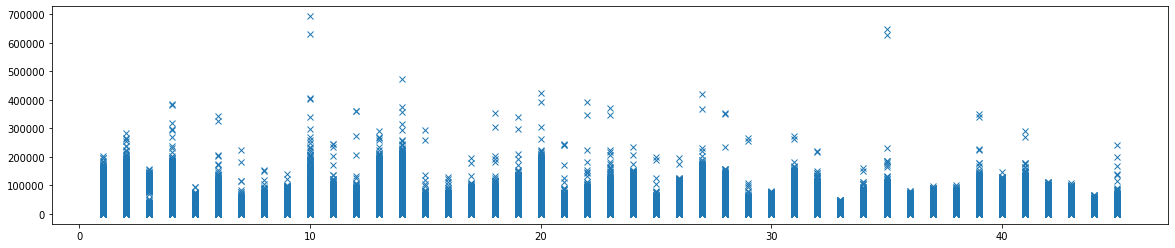

In [ ]:
plt.figure(figsize=(20,4))
x = Total_DF['Store']
y = Total_DF['Weekly_Sales']

plt.plot(x, y, 'x');

In [ ]:
Average_Weekly_Store_Sales = Total_DF.groupby(['Store']).agg(Avg_Weekly_sales = ('Weekly_Sales', 'mean')) #Seeing the Weekly average sales per store

In [ ]:
Average_Weekly_Store_Sales = Average_Weekly_Store_Sales.round(2) #round to the second decimal to make it dollars

In [ ]:
Average_Weekly_Store_Sales

,Avg_Weekly_sales
Store,
1,21749.15
2,26961.73
3,6380.23
4,29175.54
5,5065.28
6,21960.80
7,8379.49
8,13148.99
9,8805.88


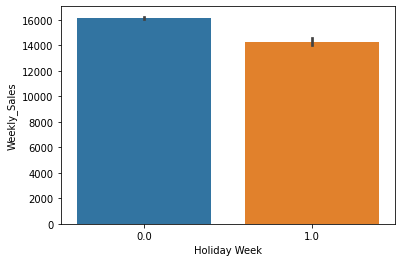

In [ ]:
sns.barplot(x='Holiday Week', y='Weekly_Sales', data=Total_DF) #Seeing the Weekly Sales for when it is a Holiday Week vs Non Holiday Week

In [ ]:
Avg_Weekly_Dept_Sales = Total_DF.groupby(['Dept']).agg(Avg_Weekly_sales = ('Weekly_Sales', 'mean')) #Getting the Average Weekly sales by grouping by Dept and getting the mean of the Weekly sales column

In [ ]:
Avg_Weekly_Dept_Sales

,Avg_Weekly_sales
Dept,
1,19213.485088
2,43607.020113
3,11793.698516
4,25974.630238
5,21368.950301
...,...
95,70209.156181
96,15286.583658
97,14444.186714


##**Departments that are missing are 15,53,57,62-64,66,68,69,70,73,75,76,84,86,88,89**

In [ ]:
Avg_Weekly_Dept_Sales.nunique() #Seeing how many Unique Department numbers in the DF

Avg_Weekly_sales    81
dtype: int64

#**Average Weekly Sales Per Store Per Department**

In [ ]:
Average_Weekly_Store_Sales_Per_Dept = Total_DF.groupby(['Dept']).agg(Avg_Weekly_sales = ('Weekly_Sales', 'mean')) #Grouping by Department and getting the mean sales

In [ ]:
Average_Weekly_Store_Sales_Per_Dept

,Avg_Weekly_sales
Dept,
1,19213.485088
2,43607.020113
3,11793.698516
4,25974.630238
5,21368.950301
...,...
95,70209.156181
96,15286.583658
97,14444.186714


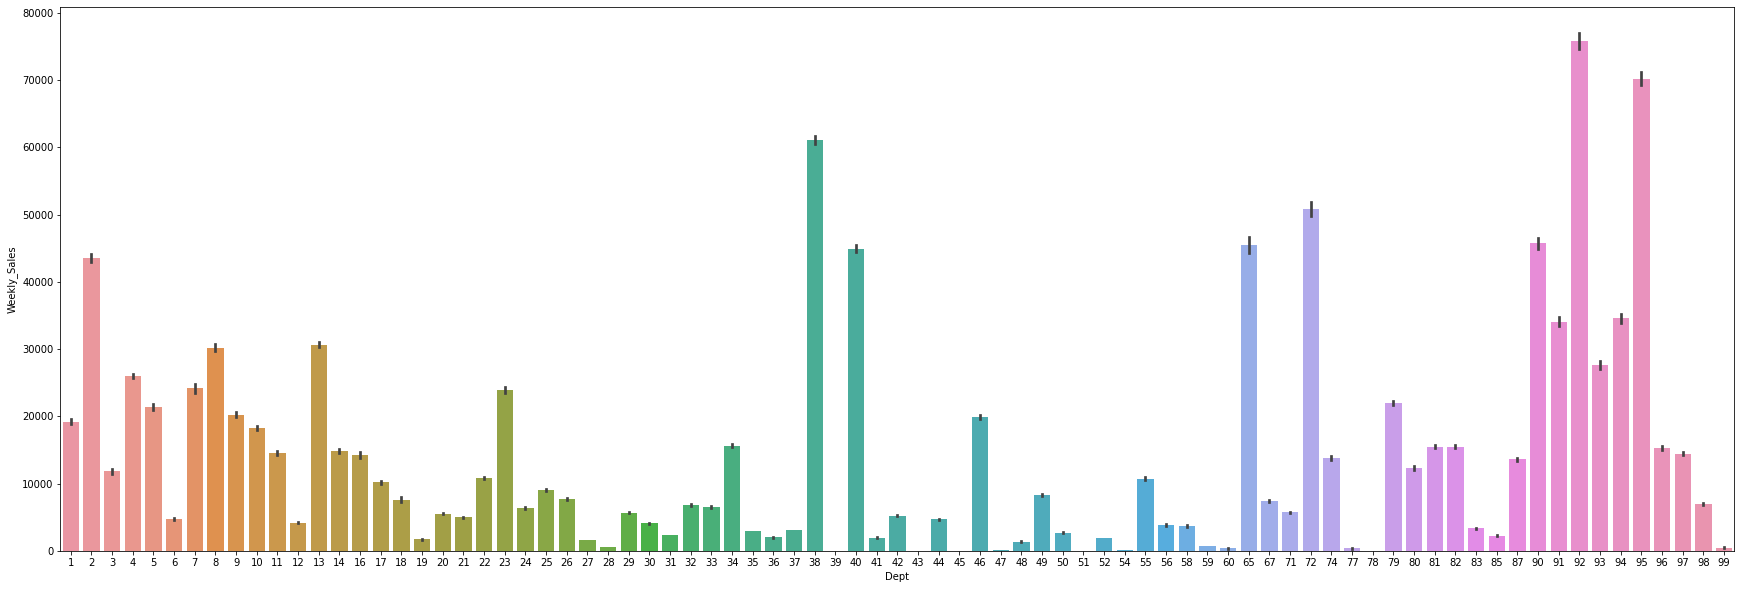

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x='Dept', y='Weekly_Sales', data=Total_DF)

#**Average Sales Per Month**

In [ ]:
Total_DF.groupby('Month')['Weekly_Sales'].mean().round(2)

Month
1     14173.22
2     16042.08
3     15462.08
4     15694.08
5     15841.80
6     16394.35
7     15900.69
8     16108.84
9     15142.43
10    15274.40
11    17536.69
12    19432.92
Name: Weekly_Sales, dtype: float64

#**Weekly Sales Per Month**

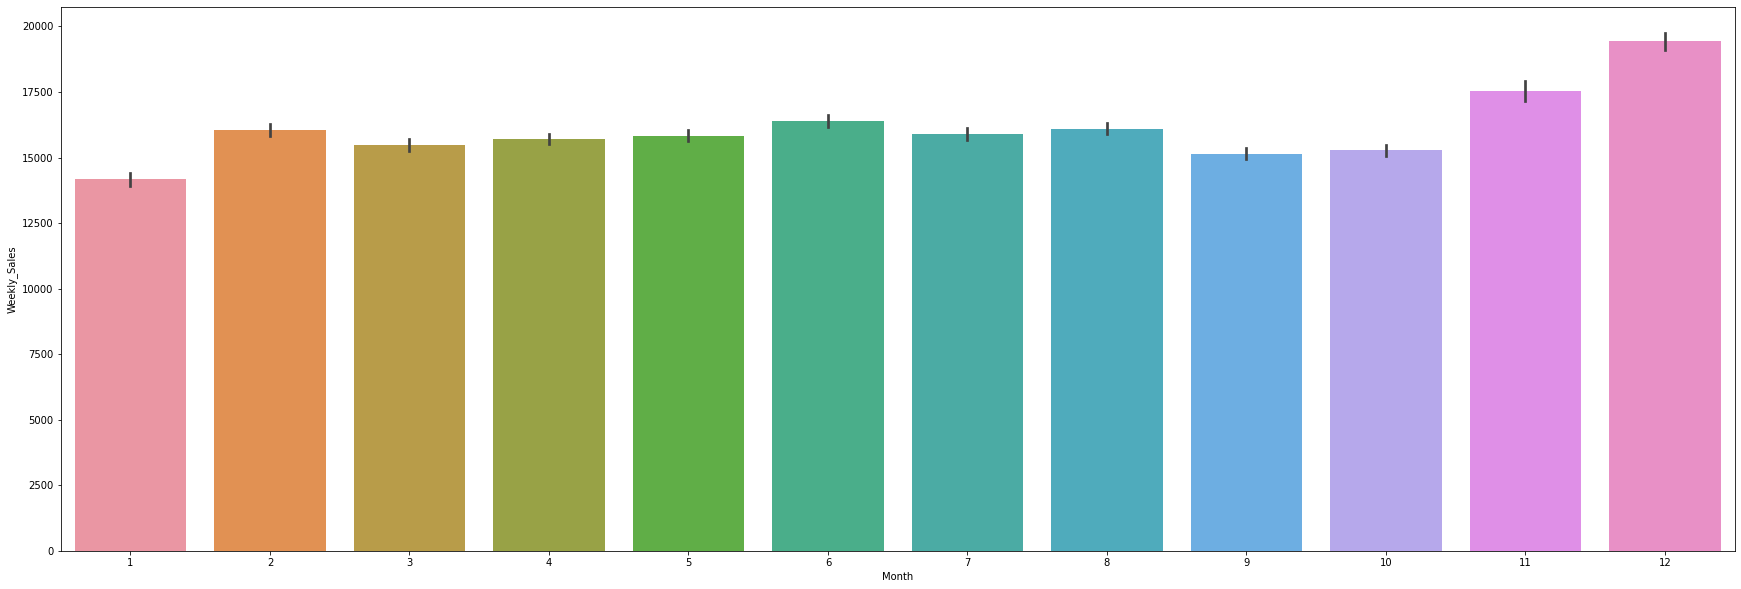

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x='Month', y='Weekly_Sales', data=Total_DF)

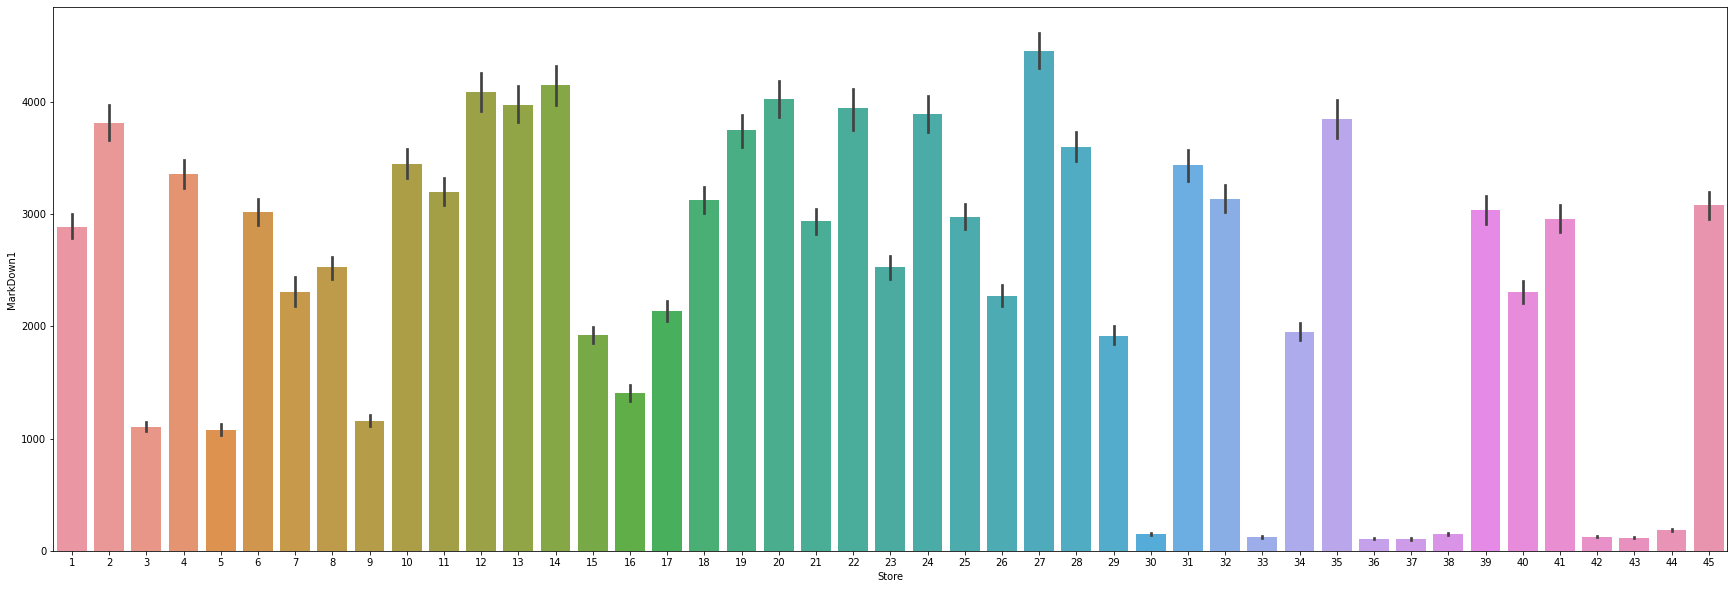

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x='Store', y='MarkDown1', data=Total_DF)

#**Sum for Yearly Sales Per Store**

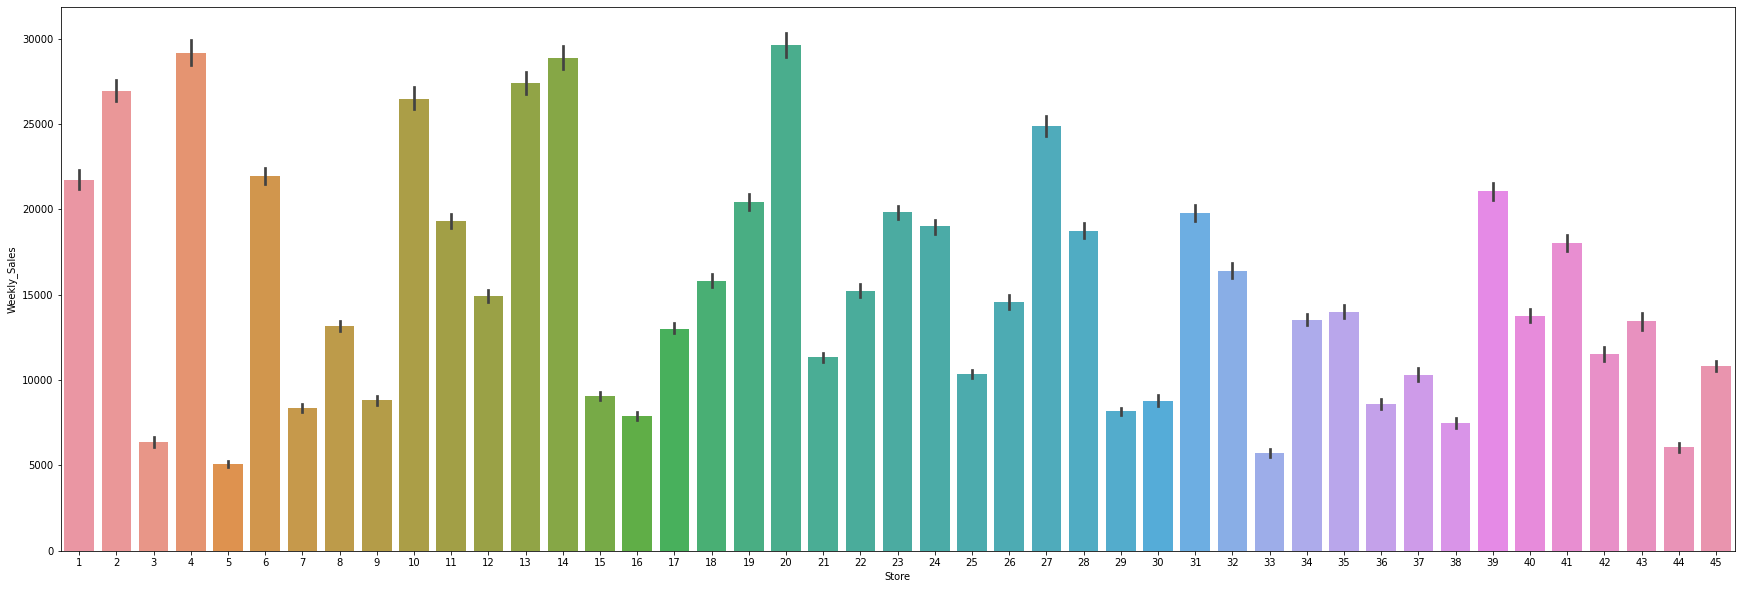

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x='Store', y='Weekly_Sales', data=Total_DF)

#**Stores Ranked By Weekly Sales**

In [ ]:
Store_Sales_Rankings = Total_DF.groupby(["Store"]).sum().sort_values("Weekly_Sales").round(2) #Ranks the Stores by Weekly_Sales values

In [ ]:
Store_Weekly_Sales_Rankings = Store_Sales_Rankings[['Weekly_Sales']] #get only the Weekly_Sales column

In [ ]:
Store_Weekly_Sales_Rankings.sort_values("Weekly_Sales", ascending=False) #Finding the Weekly Sales per Store in decending order

,Weekly_Sales
Store,
20,3.014014e+08
4,2.995453e+08
14,2.890019e+08
13,2.865180e+08
2,2.753872e+08
10,2.716241e+08
27,2.538572e+08
6,2.237586e+08
1,2.224068e+08


#**Create HeatMap Correlation Matrix to visualize the correlation of features to the Weekly Sales**

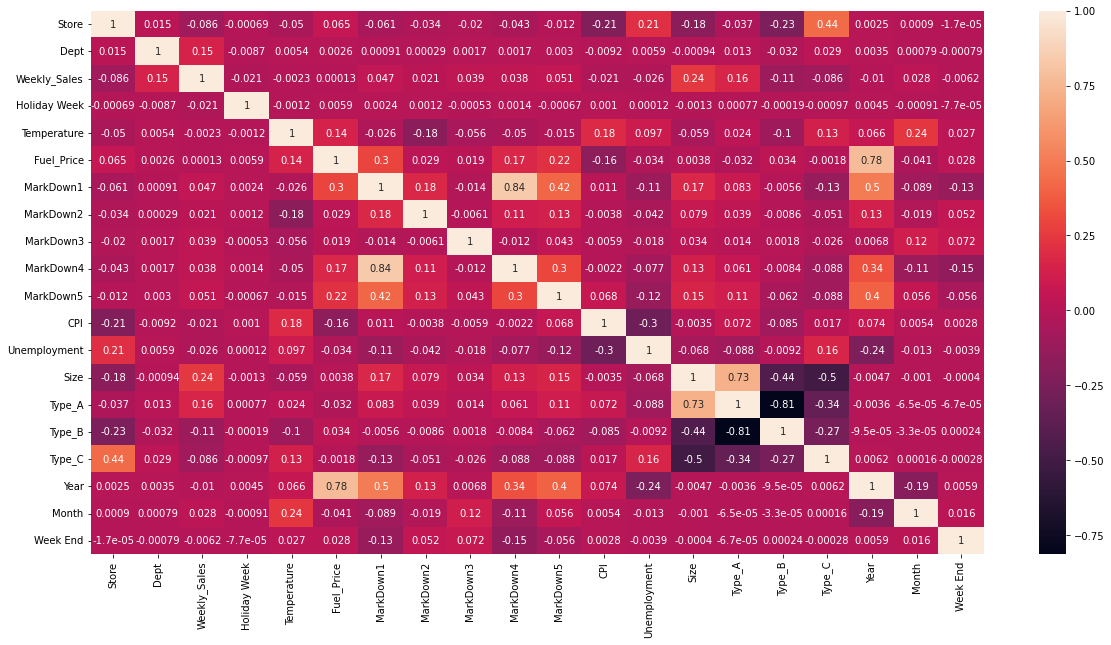

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(Total_DF.corr(), annot=True);

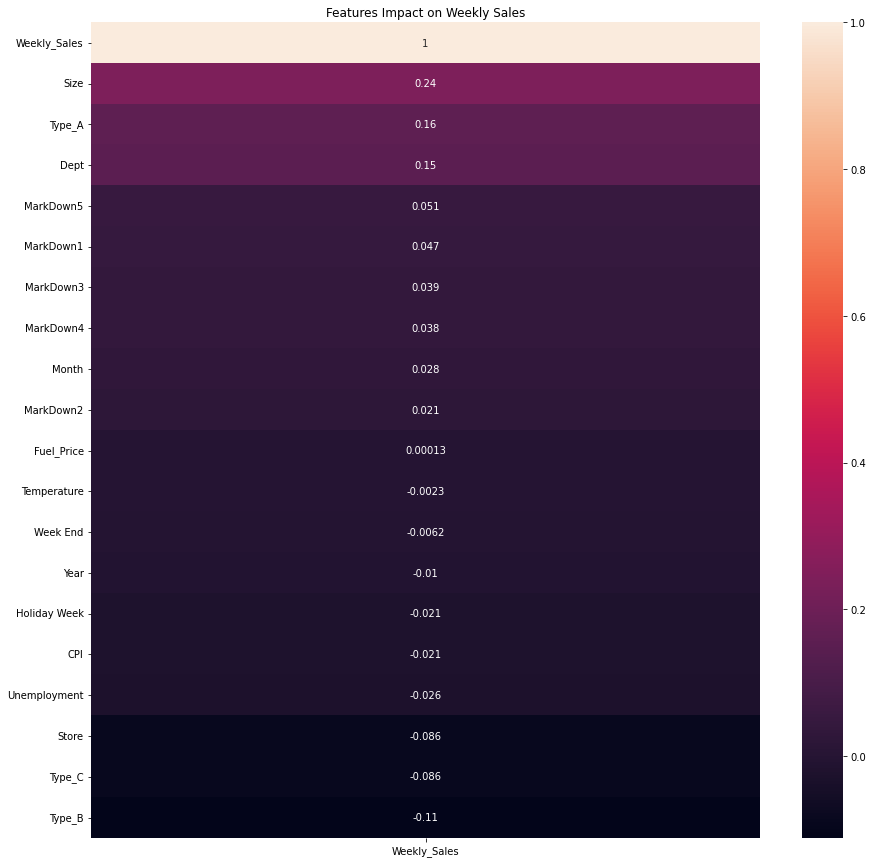

In [ ]:
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(Total_DF.corr()[['Weekly_Sales']].sort_values(by='Weekly_Sales', ascending=False), annot=True)
heatmap.set_title('Features Impact on Weekly Sales');

#Create Models to test which has the highest accuracy

#**Scale the Total_DF to see if it helps with training the models and accuracy of the model**

In [ ]:
response = Total_DF.loc[:, Total_DF.columns == 'Weekly_Sales']
feature_variables = Total_DF.loc[:, Total_DF.columns != 'Weekly_Sales']

In [ ]:
scaler = StandardScaler() #Instantiate an Object of the StandardScaler class
features_scaled = scaler.fit_transform(feature_variables) #Fit transform the Total_DF

In [ ]:
response

,Weekly_Sales
0,24924.50
143,50605.27
286,13740.12
429,39954.04
572,32229.38
...,...
419595,14618.60
419725,670.88
419868,14693.09
420011,17360.33


In [ ]:
features_scaled

array([[-1.65767747, -1.41571022, -0.2751066 , ..., -1.21507158,
        -1.3719632 , -1.21948027],
       [-1.65767747, -1.38285166,  3.63495453, ..., -1.21507158,
        -1.3719632 , -1.21948027],
       [-1.65767747, -1.34999309, -0.2751066 , ..., -1.21507158,
        -1.3719632 , -1.21948027],
       ...,
       [ 1.79554341,  1.21297486, -0.2751066 , ...,  1.29460018,
         1.09457788,  1.17975135],
       [ 1.79554341,  1.24583342, -0.2751066 , ...,  1.29460018,
         1.09457788,  1.17975135],
       [ 1.79554341,  1.27869198, -0.2751066 , ...,  1.29460018,
         1.09457788,  1.17975135]])

In [ ]:
features_scaled = pd.DataFrame(features_scaled) #Create a Dataframe from the Total_DF_scaled
features_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.657677,-1.415710,-0.275107,-0.963874,-1.719727,-0.427543,-0.173004,-0.084739,-0.277946,-0.395053,1.018304,0.079405,0.237468,0.976539,-0.794679,-0.335291,-1.215072,-1.371963,-1.219480
1,-1.657677,-1.382852,3.634955,-0.963874,-1.719727,-0.427543,-0.173004,-0.084739,-0.277946,-0.395053,1.018304,0.079405,0.237468,0.976539,-0.794679,-0.335291,-1.215072,-1.371963,-1.219480
2,-1.657677,-1.349993,-0.275107,-0.963874,-1.719727,-0.427543,-0.173004,-0.084739,-0.277946,-0.395053,1.018304,0.079405,0.237468,0.976539,-0.794679,-0.335291,-1.215072,-1.371963,-1.219480
3,-1.657677,-1.317135,-0.275107,-0.963874,-1.719727,-0.427543,-0.173004,-0.084739,-0.277946,-0.395053,1.018304,0.079405,0.237468,0.976539,-0.794679,-0.335291,-1.215072,-1.371963,-1.219480
4,-1.657677,-1.284276,-0.275107,-0.963874,-1.719727,-0.427543,-0.173004,-0.084739,-0.277946,-0.395053,1.018304,0.079405,0.237468,0.976539,-0.794679,-0.335291,-1.215072,-1.371963,-1.219480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418849,1.795543,1.147258,-0.275107,-0.067623,1.136987,0.236350,-0.161565,-0.066693,-0.223550,-0.191186,0.539223,0.379972,-0.304322,-1.024025,1.258369,-0.335291,1.294600,1.094578,1.179751
418850,1.795543,1.180116,3.634955,-0.067623,1.136987,0.236350,-0.161565,-0.066693,-0.223550,-0.191186,0.539223,0.379972,-0.304322,-1.024025,1.258369,-0.335291,1.294600,1.094578,1.179751
418851,1.795543,1.212975,-0.275107,-0.067623,1.136987,0.236350,-0.161565,-0.066693,-0.223550,-0.191186,0.539223,0.379972,-0.304322,-1.024025,1.258369,-0.335291,1.294600,1.094578,1.179751
418852,1.795543,1.245833,-0.275107,-0.067623,1.136987,0.236350,-0.161565,-0.066693,-0.223550,-0.191186,0.539223,0.379972,-0.304322,-1.024025,1.258369,-0.335291,1.294600,1.094578,1.179751


In [ ]:
Total_DF

,Store,Dept,Weekly_Sales,Holiday Week,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C,Year,Month,Week End
0,1,1,24924.50,0.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,1.0,0.0,0.0,2010,2,5
143,1,2,50605.27,1.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,1.0,0.0,0.0,2010,2,5
286,1,3,13740.12,0.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,1.0,0.0,0.0,2010,2,5
429,1,4,39954.04,0.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,1.0,0.0,0.0,2010,2,5
572,1,5,32229.38,0.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,1.0,0.0,0.0,2010,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419595,45,79,14618.60,0.0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,0.0,1.0,0.0,2012,10,26
419725,45,80,670.88,1.0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,0.0,1.0,0.0,2012,10,26
419868,45,81,14693.09,0.0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,0.0,1.0,0.0,2012,10,26
420011,45,82,17360.33,0.0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,0.0,1.0,0.0,2012,10,26


In [ ]:
X= features_scaled # Get the Features from data with no missing values
Y= response  # Get the Responses from data with no missing values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42) #split so we can train the RandomForestClassifier

#**Showing that the data is still the same as the Total_DF in the Scaled Data** 

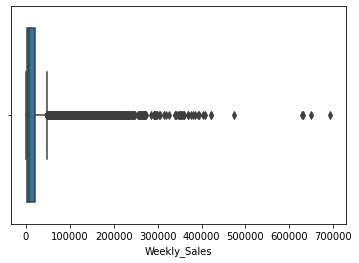

In [ ]:
sns.boxplot(x=Total_DF['Weekly_Sales'])
plt.show()

In [ ]:
def model_statistics(model,X_train,y_train,X_test,y_test): #defining a function that takes in a regression model, then the training and test data 
    m = model()
    m.fit(X_train,y_train) #fitting the model to the training data 
    y_pred = m.predict(X_test) #making predicitons on the X_test
    print(model)
    print(f'MAE:', mean_absolute_error(y_test,y_pred)) #Returns the Mean Square Error 
    print(f'MSE:', mean_squared_error(y_test,y_pred))
    print(f'R2 :', r2_score(y_test,y_pred))

In [ ]:
model_statistics(LinearRegression,X_train,y_train,X_test,y_test)

<class 'sklearn.linear_model._base.LinearRegression'>
MAE: 14628.60557903554
MSE: 476676158.6973429
R2 : 0.09429938810078398


In [ ]:
model_statistics(Lasso,X_train,y_train,X_test,y_test)

<class 'sklearn.linear_model._coordinate_descent.Lasso'>
MAE: 14628.298909995432
MSE: 476678162.67513424
R2 : 0.09429558047609199


In [ ]:
model_statistics(RandomForestRegressor,X_train,y_train,X_test,y_test)

<ipython-input-99-a1619246a3e0>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m.fit(X_train,y_train) #fitting the model to the training data


<class 'sklearn.ensemble._forest.RandomForestRegressor'>
MAE: 1386.6741685917561
MSE: 13431980.940460492
R2 : 0.9744787878839188


In [ ]:
model_statistics(GradientBoostingRegressor,X_train,y_train,X_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
MAE: 6900.974945387045
MSE: 135486849.74797478
R2 : 0.7425704632336126


In [ ]:
model_statistics(DecisionTreeRegressor,X_train,y_train,X_test,y_test)

<class 'sklearn.tree._classes.DecisionTreeRegressor'>
MAE: 1852.5238434541784
MSE: 23110178.61335298
R2 : 0.9560898892690295


##**Random Forest Regressor has the best scores for the Scaled Feature Data**

In [ ]:
#RF_params_grid = {'max_depth': [2,5,8,12],
              #'n_estimators':[5,10,20],
              #'min_samples_split' :[2,3,6,9,11,15]}
#RF_params_grid_search_cv = GridSearchCV(RandomForestRegressor(random_state=42),
                              #RF_params_grid, verbose=1, cv=3)
#RF_params_grid_search_cv.fit(X_train, y_train)
#RF_params_grid_search_cv.best_params_

{'max_depth': 12, 'min_samples_split': 3, 'n_estimators': 10}

In [ ]:
RF_params_grid = {'max_depth': [8,10,12,14],
              'n_estimators':[8,10,12,15],
              'min_samples_split' :[2,3,4]}
RF_params_grid_search_cv = GridSearchCV(RandomForestRegressor(random_state=42),
                              RF_params_grid, verbose=1, cv=3)
RF_params_grid_search_cv.fit(X_train, y_train)
RF_params_grid_search_cv.best_params_

In [ ]:
RND_FRST = RandomForestRegressor(max_depth=150, min_samples_split=3, n_estimators=150)  #RandomForestRegressor had the best score for scaled data, we try it first on the original full dataset
RND_FRST.fit(X_train, y_train)
predictions_for = RND_FRST.predict(X_test)
predictions_for = np.round_(predictions_for,2)
print(f'MAE:', mean_absolute_error(y_test, predictions_for))

<ipython-input-107-333120c98c95>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RND_FRST.fit(X_train, y_train)


MAE: 1387.7759242458608


#**Random Forest Regressor has the best scores for the Full Data Set as well**

In [ ]:
import joblib
import pickle

In [ ]:
import pickle
with open('model_pickle', 'wb') as f: #opens the file
  pickle.dump(RND_FRST,f)#dump my model into this file
with open('model_pickle', 'rb') as f: #runs the file
  mp = pickle.load(f)

In [ ]:
joblib.dump(RND_FRST, 'RND_FRST.pkl, compress=1')

['RND_FRST.pkl, compress=1']

In [ ]:
with open('model_pickle', 'wb') as f: #opens the file
  pickle.dump(RND_FRST,f)#dump my model into this file

In [ ]:
with open('model_pickle', 'rb') as f: #runs the file
  mp = pickle.load(f)

In [ ]:
Sales_predictions = mp.predict(X_test)

In [ ]:
Sales_predictions

array([  599.1172    , 20533.90861278, 50573.54669944, ...,
        6054.93261778,  1206.29527444,  7785.67283831])

In [ ]:
Sales_predictions = np.round_(Sales_predictions,2)

In [ ]:
Sales_predictions

array([  599.12, 20533.91, 50573.55, ...,  6054.93,  1206.3 ,  7785.67])

In [ ]:
Sales_predictions_DF = pd.DataFrame(Sales_predictions)

In [ ]:
Sales_predictions_DF

,0
0,599.12
1,20533.91
2,50573.55
3,25132.25
4,6421.00
...,...
83766,355.00
83767,4181.36
83768,6054.93
83769,1206.30


In [ ]:
y_test

,Weekly_Sales
290912,519.20
225875,21102.71
143228,43293.05
234776,24358.42
52749,6448.56
...,...
113225,111.50
227674,4163.86
374102,7190.50
13975,1198.05


In [ ]:
Sales_PREDICTION_NUMBERS = mp.predict([(26, 36, 1, 78, 3.50, 3, 89, 93, 3, 390, 8.7, 9, 450000, 1, 0, 0, 2026, 9, 15)])

In [ ]:
Sales_PREDICTION_NUMBERS

array([10407.12248889])